In [10]:
# import tools
import numpy as np
import pandas as pd
import wooldridge as woo
import statsmodels.formula.api as smf 
import patsy as pt
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
# question 1

In [12]:
# (a) 
# log(demand) = B1*log(price) + B2*log(income) + B3*adults + B4*children + error
# demand: quantity of RingOs demanded in ounces, price: price elasticity of RingOs, 
# adults: number of other adults individual lives with, 
# children: children in household between the ages of 5 and 18 

In [13]:
# (b)
# i would use the estimator Bhat = (x'x)^-1x'y

In [14]:
# (c)
# underlying assumptions you would need to make are 1) the regression is linear
# in parameters; would not violate because the coefficients and error term should 
# be linear, 2) no perfect collinearity; would not violate becuase none of the 
# coefficients should have a perfectly linear relationship because none of them 
# measure remotely similar things, 3) the conditional mean equals zero; would not violate
# because the error terms should not depend on the independent variables of price, income, 
# adults, or children, 4) homoskedasticity is present; would not violate as the variances are 
# constant when conditional on X, 5) no serial correlation or endogeneity, so that all 
# error terms are uncorrelated with each other and the coefficients; might violate because
# omitted variable bias creates endogeneity and there are outside factors affecting
# the demand of RingOs, such as location, culture, etc. that are not measured in the
# regression.

In [15]:
# (d) 
# Bhat = (x'x)^-1x'y
#      = (x'x)^-1x'(xB+e)
#      = (x'x)^-1x'xB + (x'x)^-1x'e
#      = B + (x'x)^-1x'e
# E(Bhat) = E(B) + E[(x'x)^-1x'e]
#         = B + (x'x)^-1x'E(e)
#         = B therefore, the OLS estimator is unbiased and consistent

In [16]:
# (e) 
# when the error term is normally distributed, the coefficients like price and income
# elasticity will also be normally distributed as their estimators are linear vectors 
# of the error terms.

# according to the central limit theorem, sample sizes at or above 30 are most likely
# to approximate a normal distribution.

In [17]:
# (f) 
# B1 on log(price) would be negative because the higher price elasticity of a good
# the more likely people are to lower their demand for RingOs as its price heightens.

# B2 on log(income) would be positive because, assuming RingOs are a normal good, 
# people with higher incomes will most likely purchase more of them.

# B3 and B4 on adults and children would both be positive because logically, 
# the larger the household, the more food and therefore RingOs bought and consumed.

# specific statistics i would use to evaluate my regression model are t tests on each 
# coefficient to determine their significance an f test to determine the significance
# of the OLS equation as a whole, and the adjusted R squared to determine what percentage
# of the variance in demand is explained by the independent variables and will increase
# when new terms are added to improve the regression.

In [18]:
# (g) 
# post estimation, i would perform the variance inflation factor (VIF) to measure 
# the amount of multicollinearity in the linear regression.

# additionally, i'd use the White and Breusch–Pagan tests to see if the errors' 
# variances are constant and test for heteroskedasticity.

In [19]:
# question 2

In [20]:
# (a) 
# casual or treatment effect is the effect a binary variable that holds a value 
# of 0 or 1 has on a given dependent variable, potentially investigating a policy. 

In [21]:
# (b)
# the average casual effect (ACE) or average treatment effect (ATE) is the mean of
# all casual/treatment effects in the studies' population.

In [22]:
# (c) 
# the treatment group is the part of the population subject to the binary variables'
# value of 1, the policy or intervention in effect.

# the control group is the part of the population subject to the binary variables'
# value of 0, meaning the group does not receive the policy or intervention.

In [23]:
# (d) 
# a counterfactual outcome is the hypothetical experience one would have faced
# if they had been a part of the treatment group and issued the policy or 
# intervention.

In [24]:
# (e) 
# randomized controlled trial (RCT) is a study that randomly assigns groups of the
# population to either the treatment or control group.

In [25]:
# (f) 
# import cvs 
jobdata = pd.read_csv('/Users/zoeyroberts/Documents/Spring 2022/Econs 525/JTRAIN98.csv', delimiter=',', header=None,
                       names=['train','age','educ','black','hisp','married','earn96','unemp96','earn98','unem98'])
pd.set_option('display.max_rows', 10)
print(f'testdata: \n{jobdata}\n')

testdata: 
      train  age  educ  black  hisp  married    earn96  unemp96     earn98  \
0         0   37    11      1     0        1   0.00000        1   1.617924   
1         0   30    12      1     0        0   0.00000        1   0.000000   
2         1   27    11      1     0        0   0.00000        1   0.000000   
3         1   33     8      1     0        0   0.00000        1   9.070150   
4         0   22     9      1     0        0   0.00000        1   4.019341   
...     ...  ...   ...    ...   ...      ...       ...      ...        ...   
1125      1   48    10      0     0        1   5.72904        0   0.000000   
1126      0   28    11      0     0        1  10.74194        0  15.375220   
1127      0   52    11      0     0        1   0.00000        1   0.000000   
1128      1   48     8      0     0        1   0.00000        1   7.408490   
1129      1   32     9      0     0        1   2.86452        0  11.925550   

      unem98  
0          0  
1          1  
2      

In [26]:
# summary statistics 
Data_summary = jobdata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# (i) 
# 17.17 percent of workers were unemployed in 1998 after the job training
# compared to 31.23 percent in 1996

Data_summary:
             train          age         educ        black         hisp  \
count  1130.000000  1130.000000  1130.000000  1130.000000  1130.000000   
mean      0.332743    31.938938    10.965487     0.439823     0.045133   
std       0.471404    10.882853     2.964755     0.496585     0.207687   
min       0.000000    17.000000     0.000000     0.000000     0.000000   
25%       0.000000    23.000000     9.000000     0.000000     0.000000   
50%       0.000000    28.000000    12.000000     0.000000     0.000000   
75%       1.000000    41.000000    12.000000     1.000000     0.000000   
max       1.000000    55.000000    17.000000     1.000000     1.000000   

           married       earn96      unemp96       earn98       unem98  
count  1130.000000  1130.000000  1130.000000  1130.000000  1130.000000  
mean      0.692035    12.199981     0.312389     9.927755     0.171681  
std       0.461856    11.109135     0.463673     7.730107     0.377270  
min       0.000000     0.00

In [27]:
reg = smf.ols(formula='unem98 ~ train', data=jobdata)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# (ii) 
# the coefficient on train is 0.0257, meaning people who received the training
# were 2.57 percent more likely to be unemployed.

# train's coefficient is not significant because the p-value is 0.281 which is 
# less than 0.05.

# this does not make sense because one would expect someone to be more
# employable once they receive specific job training.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 unem98   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.164
Date:                Tue, 08 Mar 2022   Prob (F-statistic):              0.281
Time:                        16:07:46   Log-Likelihood:                -500.80
No. Observations:                1130   AIC:                             1006.
Df Residuals:                    1128   BIC:                             1016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1631      0.014

In [28]:
reg = smf.ols(formula='unem98 ~ train + earn96 + educ + age + married', data=jobdata)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# (iii) 
# the estimated training effect is now that someone is 12.08 percent less likely
# to be unemployed after receiving the training.

# this differs so much from part ii because adding more variables to the 
# regression, which in turn makes train's coefficient more accurate and have a 
# logical effect.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 unem98   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     67.99
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           3.63e-62
Time:                        16:07:47   Log-Likelihood:                -352.09
No. Observations:                1130   AIC:                             716.2
Df Residuals:                    1124   BIC:                             746.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2896      0.063

In [29]:
jobdata['av_married'] = jobdata['married'] - np.mean(jobdata['married'])
jobdata['av_age'] = jobdata['age'] - np.mean(jobdata['age'])
jobdata['av_educ'] = jobdata['educ'] - np.mean(jobdata['educ'])
jobdata['av_earn96'] = jobdata['earn96'] - np.mean(jobdata['earn96'])

reg = smf.ols(formula='unem98 ~ train + earn96 + educ + age + married \
              + train:av_earn96 + train:av_educ + train:av_age \
              + train:av_married', data=jobdata)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')


# (iv)
# the estimated average treatment effect of train grew slightly by 0.008 with its 
# standard error acting similarly and increasing by only 0.006.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 unem98   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     37.88
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           5.26e-59
Time:                        16:07:47   Log-Likelihood:                -351.23
No. Observations:                1130   AIC:                             722.5
Df Residuals:                    1120   BIC:                             772.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

In [30]:
# automated f test
hypotheses1 = ['train:av_married = train:av_age = train:av_educ = train:av_earn96 = 0']
ftest = results.f_test(hypotheses1)

fstat = ftest.statistic[0][0]
fpval = ftest.pvalue
print(f'fstat1: {fstat}\n')
print(f'fpval1: {fpval}\n')

# (v)
# the interaction terms are not jointly significant are all equal zero because
# their collective p value is 0.79 and greater than 0.05.

fstat1: 0.4264285114371775

fpval1: 0.7896388024065438



In [165]:
# regression with training
reg = smf.ols(formula='unem98 ~ train + earn96 + educ + age + married \
              + train:av_earn96 + train:av_educ + train:av_age \
              + train:av_married', data=jobdata, 
             subset=(jobdata['train'] == 1))
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')
unem98_hat1 = results.fittedvalues
print(unem98_hat1)

# regression without training
reg = smf.ols(formula='unem98 ~ train + earn96 + educ + age + married \
              + train:av_earn96 + train:av_educ + train:av_age \
              + train:av_married', data=jobdata, 
             subset=(jobdata['train'] == 0))
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')
unem98_hat2 = results.fittedvalues
print(unem98_hat2)

# (vi)
# in both regressions with and and without training (either equal to 0 or 1)
# the train coefficient's value is essentially zero.

# out of the two approaches, the first is more convienent for obtaining a standard error
# because it is a less extensive calculation process.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 unem98   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     16.45
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.03e-12
Time:                        19:35:42   Log-Likelihood:                -150.10
No. Observations:                 376   AIC:                             310.2
Df Residuals:                     371   BIC:                             329.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7.

/Users/zoeyroberts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [32]:
# (g) 
# i don't think the policy experiement with the JTRAIN98 data set fits
# the criteria for a randomized control trial (RCT) because in order to 
# enroll in a federally administered job training, one would already be 
# unemployed.

# therefore, the study has no way of randomly assigning who gets the job
# training in question, because the experiement's entire population 
# would be unemployed.

# furthermore, there would be no randomization of the control and  
# obviously fails to meet the requirements of RCT.

In [33]:
# question 3
# import csv file
fencedata = pd.read_csv\
('/Users/zoeyroberts/Documents/Spring 2022/Econs 525/HouseSalesData.csv', delimiter=',', header=None,
names = ['City_zone','HomeAge','No_Baths','No_Bedrooms', 'No_FirePlace','No_GrageSpaces','No_LivingRms', \
        'Tot_SQFT','SalePrice'])
print(f'testdata: \n{fencedata}\n')

testdata: 
     City_zone  HomeAge  No_Baths  No_Bedrooms  No_FirePlace  No_GrageSpaces  \
0            1        6         2            3             0               2   
1            4       59         3            4             1               0   
2            4       56         3            3             0               2   
3            1       11         3            4             0               2   
4            2        3         2            3             1               2   
..         ...      ...       ...          ...           ...             ...   
235          1        0         3            4             1               3   
236          2       10         2            4             1               2   
237          2       14         2            4             1               2   
238          1       11         2            4             1               2   
239          1        0         4            5             1               2   

     No_LivingRms  Tot_SQFT 

In [34]:
# (a) 
# city zone dummy variables
dummy = pd.get_dummies(fenc
                       edata['City_zone'])
fencedata = pd.concat([fencedata,dummy], axis=1)
fencedata = fencedata.rename(columns = {"1":"zone1", "2":"zone2", "3":"zone3", "4":"zone4"})
fencedata.columns = ['City_zone', 'HomeAge', 'No_Baths', 'No_Bedrooms', 'No_FirePlace', \
                     'No_GrageSpaces', 'No_LivingRms', 'Tot_SQFT', 'SalePrice', 'zone1', \
                     'zone2', 'zone3', 'zone4']
print(fencedata)

# log variables
fencedata['SalePriceln'] = np.log(fencedata['SalePrice'])
fencedata['Tot_SQFTln'] = np.log(fencedata['Tot_SQFT'])
print(fencedata)

     City_zone  HomeAge  No_Baths  No_Bedrooms  No_FirePlace  No_GrageSpaces  \
0            1        6         2            3             0               2   
1            4       59         3            4             1               0   
2            4       56         3            3             0               2   
3            1       11         3            4             0               2   
4            2        3         2            3             1               2   
..         ...      ...       ...          ...           ...             ...   
235          1        0         3            4             1               3   
236          2       10         2            4             1               2   
237          2       14         2            4             1               2   
238          1       11         2            4             1               2   
239          1        0         4            5             1               2   

     No_LivingRms  Tot_SQFT  SalePrice 

In [35]:
# (b) 
# by just looking through the dataset, some intrinsic values the different housing 
# zone seem to have are that zone 1 houses appear to be on the cheaper side in terms 
# of sales prices while zone 4 houses are typically more expensive.

In [36]:
# regression
reg = smf.ols(formula='SalePriceln ~ Tot_SQFTln + HomeAge + No_Baths + \
                       No_Bedrooms + No_FirePlace + No_GrageSpaces + \
                       No_LivingRms + zone1 + zone2 + zone3', data=fencedata)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# (c) 
# SalePriceln = 8.5522 + 0.7279*Tot_SQFTln + 0.0002*HomeAge + 0.0009*No_Baths +
# -0.0408*No_Bedrooms + No_Bedrooms*No_FirePlace + 0.0748*No_GrageSpaces
# 0.0215*No_LivingRms + -1.2116*zone1 + -1.2891*zone2 + -0.6130*zone3

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:            SalePriceln   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     154.1
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           8.90e-96
Time:                        16:07:50   Log-Likelihood:                 72.506
No. Observations:                 240   AIC:                            -123.0
Df Residuals:                     229   BIC:                            -84.72
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.552

Text(0.5, 0, 'u_hat')

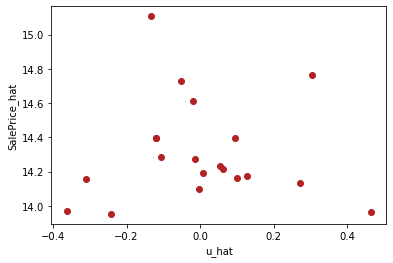

In [63]:
# plotting residuals 
u_hat = results.resid
SalePrice_hat = results.fittedvalues
plt.plot(u_hat, SalePrice_hat, color='firebrick', marker='o', linestyle='')
plt.ylabel('SalePrice_hat')
plt.xlabel('u_hat')

# (d)
# given that the smallest eigenvalue is basically zero, the regression notes say
# there may be issues of stong multicollinearity, meaning two or more of the 
# coefficients are correlated with one another.

# creating log coefficients of SalePriceln and Tot_SQFTln since they are continuous
# terms should lead to no heteroskedasticity, which is confirmed by the random distribution
# of the residuals and SalePrice fitted values below.

In [49]:
# calculate vif to test multicollinearity
X = fencedata[['HomeAge', 'No_Baths', 'No_Bedrooms', 'No_FirePlace', 'No_GrageSpaces', \
               'No_LivingRms', 'Tot_SQFT', 'zone1', 'zone2', 'zone3']]
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

# (e)
# given the large vif values, there are strong multicollinearity just as the
# regression notes predicted.

         variable        VIF
0         HomeAge   2.934901
1        No_Baths  32.917920
2     No_Bedrooms  48.779260
3    No_FirePlace   5.001637
4  No_GrageSpaces  14.028107
5    No_LivingRms  12.009781
6        Tot_SQFT  45.848330
7           zone1   8.201089
8           zone2   7.293088
9           zone3   1.992205


In [50]:
# regression for zone 1
reg = smf.ols(formula= 'SalePriceln ~ Tot_SQFTln + HomeAge + No_Baths + \
                       No_Bedrooms + No_FirePlace + No_GrageSpaces + \
                       No_LivingRms + City_zone', data=fencedata, 
             subset=(fencedata['City_zone'] == 1))
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

reg = smf.ols(formula= 'SalePriceln ~ Tot_SQFTln + HomeAge + No_Baths + \
                       No_Bedrooms + No_FirePlace + No_GrageSpaces + \
                       No_LivingRms + City_zone', data=fencedata, 
             subset=(fencedata['City_zone'] == 2))
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

reg = smf.ols(formula= 'SalePriceln ~ Tot_SQFTln + HomeAge + No_Baths + \
                       No_Bedrooms + No_FirePlace + No_GrageSpaces + \
                       No_LivingRms + City_zone', data=fencedata, 
             subset=(fencedata['City_zone'] == 3))
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

reg = smf.ols(formula= 'SalePriceln ~ Tot_SQFTln + HomeAge + No_Baths + \
                       No_Bedrooms + No_FirePlace + No_GrageSpaces + \
                       No_LivingRms + City_zone', data=fencedata, 
             subset=(fencedata['City_zone'] == 4))
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# (f) 
# the model pooling all city zone into one model with dummy variables is better than separating 
# each zone using multiple regressions because while the subset regressions of city zones 1 and 2
# have a decent number of statistically significant variables and relatively high adjusted
# r-squared values, the subset regressions of city zone 3 and 4 are either negative or much
# lower in comparison to the others and also have much fewer significant variables.

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:            SalePriceln   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     67.25
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.28e-35
Time:                        16:20:27   Log-Likelihood:                 45.201
No. Observations:                 110   AIC:                            -74.40
Df Residuals:                     102   BIC:                            -52.80
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.947

/Users/zoeyroberts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/zoeyroberts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/zoeyroberts/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [51]:
# (g) 
# i selected the pooling model with dummy variables as the best because it has an impressive 
# adjusted r-squared of 0.865, which means 86.5 percent of the variance in SalePricesln
# is explained by all the independent variables in the regression.

# additionally, there are seven statistically significant variables in the model.

# although, the pooling model warns of multicollinearity problems, the subset regression 
# models also contain similar statememts, so this does not make them any superior to the
# original pooling model.

In [52]:
# (h) 
# all parameters are linear and accounted for given the adjustments made of 
# transforming PriceSales and Tot_SQFT into log coefficients.

# while there are signs of multicollinearity in the regression results, the pooling
# model cannot have perfect multicollinearity because otherwise the coefficient would 
# not have estimated values.

# heteroskedasticity was tested for by creating log coefficients for the continuous 
# variables as well as examining a scatter plot of the regressions residuals and the 
# SalePrice fitted values.

# endongeneity should also not be an issue due to the model being quite comprehensive
# by accounting for affecting factors such as home age, size, location in town, etc. 

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:            SalePriceln   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     154.1
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           8.90e-96
Time:                        17:34:16   Log-Likelihood:                 72.506
No. Observations:                 240   AIC:                            -123.0
Df Residuals:                     229   BIC:                            -84.72
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.552

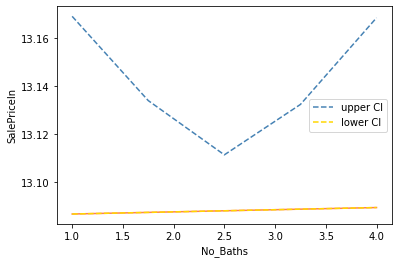

In [106]:
# (i)
# rerun chosen model
reg = smf.ols(formula='SalePriceln ~ Tot_SQFTln + HomeAge + No_Baths + \
                       No_Bedrooms + No_FirePlace + No_GrageSpaces + \
                       No_LivingRms + zone1 + zone2 + zone3', data=fencedata)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# set all variables (besides No_baths) at their mean values
Tot_SQFTln_mean = np.mean(fencedata['Tot_SQFTln'])
HomeAge_mean = np.mean(fencedata['HomeAge'])
No_Bedrooms_mean = np.mean(fencedata['No_Bedrooms'])
No_FirePlace_mean = np.mean(fencedata['No_FirePlace'])
No_GrageSpaces_mean = np.mean(fencedata['No_GrageSpaces'])
No_LivingRms_mean = np.mean(fencedata['No_LivingRms'])
zone1_mean = np.mean(fencedata['zone1'])
zone2_mean = np.mean(fencedata['zone2'])
zone3_mean = np.mean(fencedata['zone3'])
F = pd.DataFrame({'No_Baths': np.linspace(1, 4, num=5),
                  'Tot_SQFTln': Tot_SQFTln_mean,
                  'HomeAge': HomeAge_mean,
                  'No_Bedrooms': No_Bedrooms_mean,
                  'No_FirePlace': No_FirePlace_mean,
                  'No_GrageSpaces': No_GrageSpaces_mean, 
                  'No_LivingRms': No_LivingRms_mean,
                  'zone1': zone1_mean,
                  'zone2': zone2_mean,
                  'zone3': zone3_mean})    
print(f'X: \n{F}\n')

# 95% confidence intervals
PICI = results.get_prediction(F).summary_frame(alpha=0.05)
CI = PICI[['mean', 'mean_ci_lower', 'mean_ci_upper']]
print(f'CI: \n{CI}\n')

# plot 
plt.plot(F['No_Baths'], CI['mean'], color='coral',
         linestyle='-', label='')
plt.plot(F['No_Baths'], CI['mean_ci_upper'], color='steelblue',
         linestyle='--', label='upper CI')
plt.plot(F['No_Baths'], CI['mean'], color='gold',
         linestyle='--', label='lower CI')
plt.ylabel('SalePriceln')
plt.xlabel('No_Baths')
plt.legend()

In [2]:
# (j)
# all parameters are linear and accounted for given the adjustments made of 
# transforming PriceSales and Tot_SQFT into log coefficients.

# while there are signs of multicollinearity in the regression results, the pooling
# model cannot have perfect multicollinearity because otherwise the coefficient would 
# not have estimated values.

# heteroskedasticity was tested for by creating log coefficients for the continuous 
# variables as well as examining a scatter plot of the regressions residuals and the 
# SalePrice fitted values.

# endongeneity should also not be an issue due to the model being quite comprehensive
# by accounting for affecting factors such as home age, size, location in town, etc. 

In [120]:
fencereg = smf.ols(formula='SalePriceln ~ Tot_SQFTln + HomeAge + No_Baths + \
                    No_Bedrooms + No_FirePlace + No_GrageSpaces + No_LivingRms \
                    + zone1 + zone2 + zone3', data=fencedata)
results = fencereg.fit()
print (f'results.summary(): \n{results.summary()}\n')

num_samples = 1000
betas = []

for i in range(num_samples):
    bootstrap = fencedata.sample(n=240, replace=True, axis=0)
    fencereg2 = smf.ols(formula='SalePriceln ~ Tot_SQFTln + HomeAge + No_Baths + \
                    No_Bedrooms + No_FirePlace + No_GrageSpaces + No_LivingRms \
                    + zone1 + zone2 + zone3', data=bootstrap)
    betas.append(fencereg2.fit().params)

bootstrap_res= fencereg2.fit()
print(f'bootstrap_res.summary(): \n{bootstrap_res.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:            SalePriceln   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     154.1
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           8.90e-96
Time:                        18:27:46   Log-Likelihood:                 72.506
No. Observations:                 240   AIC:                            -123.0
Df Residuals:                     229   BIC:                            -84.72
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.552

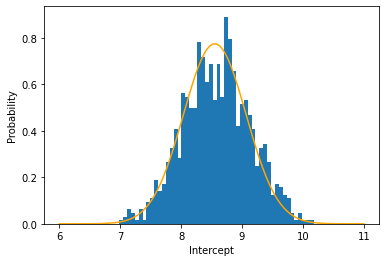

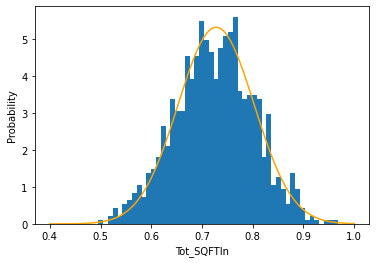

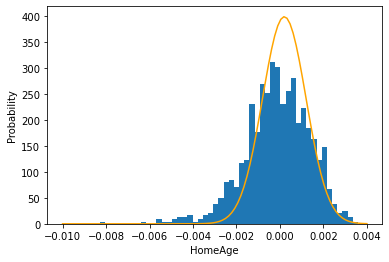

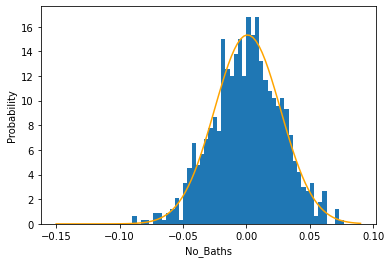

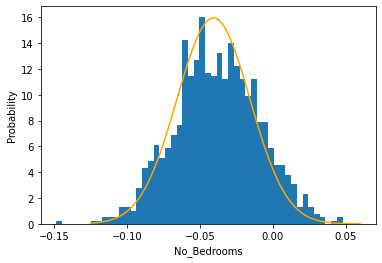

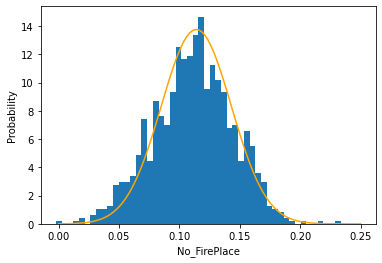

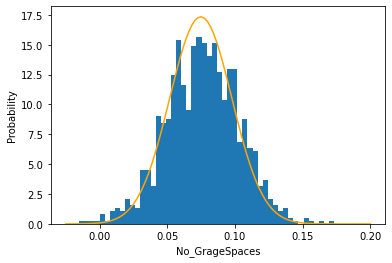

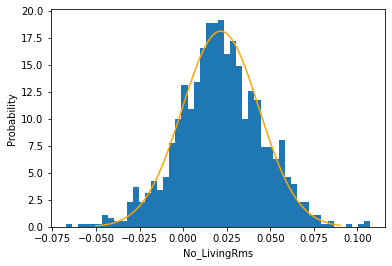

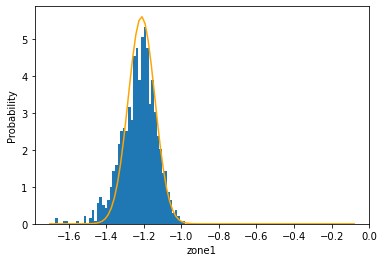

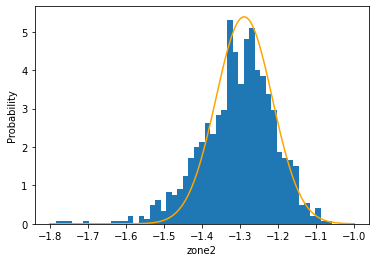

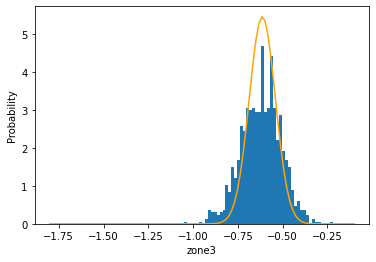

In [122]:
results_array = np.array(betas)
plt.hist(results_array[:,0], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Intercept')
Intercept_range = np.linspace(6, 11, num=100)
pdf = stats.norm.pdf(Intercept_range, 8.552, .515)
plt.plot(Intercept_range, pdf, linestyle='-', color='orange')
plt.show()

plt.hist(results_array[:,1], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Tot_SQFTln')
Tot_SQFTln_range = np.linspace(.4, 1, num=100)
pdf = stats.norm.pdf(Tot_SQFTln_range, .7279, .075)
plt.plot(Tot_SQFTln_range, pdf, linestyle='-', color='orange')
plt.show()

plt.hist(results_array[:,2], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('HomeAge')
HomeAge_range = np.linspace(-.01, .004, num=100)
pdf = stats.norm.pdf(HomeAge_range, 0.0002, 0.001)
plt.plot(HomeAge_range, pdf, linestyle='-', color='orange')
plt.show()

plt.hist(results_array[:,3], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('No_Baths')
No_Baths_range = np.linspace(-.15, .09, num=100)
pdf = stats.norm.pdf(No_Baths_range, .0009, .026)
plt.plot(No_Baths_range, pdf, linestyle='-', color='orange')
plt.show()


plt.hist(results_array[:,4], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('No_Bedrooms')
No_Bedrooms_range = np.linspace(-.125, .06, num=100)
pdf = stats.norm.pdf(No_Bedrooms_range, -.0408, .025)
plt.plot(No_Bedrooms_range, pdf, linestyle='-', color='orange')
plt.show()

plt.hist(results_array[:,5], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('No_FirePlace')
No_FirePlace_range = np.linspace(0, .25, num=100)
pdf = stats.norm.pdf(No_FirePlace_range, .1140, .029)
plt.plot(No_FirePlace_range, pdf, linestyle='-', color='orange')
plt.show()

plt.hist(results_array[:,6], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('No_GrageSpaces')
No_GrageSpaces_range = np.linspace(-.025, .2, num=100)
pdf = stats.norm.pdf(No_GrageSpaces_range, .0748, .023)
plt.plot(No_GrageSpaces_range, pdf, linestyle='-', color='orange')
plt.show()

plt.hist(results_array[:,7], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('No_LivingRms')
No_LivingRms_range = np.linspace(-.05, .09, num=100)
pdf = stats.norm.pdf(No_LivingRms_range, .0215, .022)
plt.plot(No_LivingRms_range, pdf, linestyle='-', color='orange')
plt.show()

plt.hist(results_array[:,8], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('zone1')
zone1_range = np.linspace(-1.7, -.08, num=100)
pdf = stats.norm.pdf(zone1_range, -1.2116, .071)
plt.plot(zone1_range, pdf, linestyle='-', color='orange')
plt.show()

plt.hist(results_array[:,9], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('zone2')
zone2_range = np.linspace(-1.8, -1, num=100)
pdf = stats.norm.pdf(zone2_range, -1.2891, .074)
plt.plot(zone2_range, pdf, linestyle='-', color='orange')
plt.show()

plt.hist(results_array[:,10], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('zone3')
zone3_range = np.linspace(-1.8, -.1, num=100)
pdf = stats.norm.pdf(zone3_range, -.6130, .073)
plt.plot(zone3_range, pdf, linestyle='-', color='orange')
plt.show()

In [ ]:
# (k) 
# given my histograms with overlayed pdf curves i have little to no conerns
# with the model.

# the normal pdf distribution curves fit the coefficients relatively well, meaning
# OLS assumption one of linearity is upheld and i can continue to use p-values
# to determine the significance of my coefficents.

In [76]:
# (l) 
# i would recommend the remodeling projects of adding an expansion based on  
# Tot_SQFTln coefficient's significant value of 0.6795 as well as 
# adding fireplaces since No_Fireplace has a significant coefficient of 0.1198.

# garage spaces are also key as its coefficient of 0.0748 is significant.

# additionally, given that zones 1, 2, and 3 all have significant and negative coefficients,
# and zone 4 is included in the intercept calculation when the other three dummy variables 
# equal zero, one can conclude that it is the best zone to live in, so people should 
# invest in property in that area.

In [77]:
# question 4

In [123]:
# (i) 
# if there is discrimination against minorities, and the appropriate factors 
# have been controlled for, the sign of B1 is positive.

In [126]:
loan = woo.dataWoo('LOANAPP')
reg = smf.ols(formula='approve ~ white', data=loan)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.81e-23
Time:                        18:41:48   Log-Likelihood:                -555.54
No. Observations:                1989   AIC:                             1115.
Df Residuals:                    1987   BIC:                             1126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7078      0.018

In [127]:
# (ii)
# the coefficient on white means that a white individual is 20.06% more likely
# to get loan approval than someone from a minority group.

# it is significant because the p-value is less than .05.

# practically, this is extremely large because that implies a significant number
# of nonwhite peoplep will get their loan applications rejected simply based on the 
# color of their skin. 

In [129]:
reg = smf.ols(formula='approve ~ white + hrat + obrat + loanprc + unem + \
              male + married + dep + sch + cosign + chist + pubrec + mortlat1 + \
              mortlat2 + vr', data=loan)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     25.86
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.84e-66
Time:                        18:48:04   Log-Likelihood:                -429.26
No. Observations:                1971   AIC:                             890.5
Df Residuals:                    1955   BIC:                             979.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9367      0.053

In [130]:
# (iii) 
# the coefficient on white decreases to .1288 meaning a white person is 
# 12.88% more likely to get approved for a loan than someone in a minority
# group, so yes there is still evidence of discrimination against nonwhites.

In [150]:
reg = smf.ols(formula='approve ~ white:obrat + white + hrat + obrat + loanprc + unem + \
              male + married + dep + sch + cosign + chist + pubrec + mortlat1 + \
              mortlat2 + vr', data=loan)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     25.67
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           4.12e-62
Time:                        19:12:08   Log-Likelihood:                -441.43
No. Observations:                1971   AIC:                             912.9
Df Residuals:                    1956   BIC:                             996.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0009   5.01e

In [151]:
# (iv)
# the interaction term, white_obrat is significant, but relatively small
# at 0.0042.

In [174]:
CI95 = results.conf_int(0.05) 
print(f'CI95: \n{CI95}\n')

# (v) 
# the interaction coefficient white:obrat is 0.0042.

# when multiplied by 32, it equals 0.1344.

# therefore, when obrat = 32, being white gives someone a 13.44% higher chance higher 
# of being approved for a loan.

CI95: 
                     0         1
Intercept     0.000752  0.000948
whiteobrat32  0.002994  0.005420
white         0.000094  0.000169
hrat         -0.004063 -0.000228
obrat         0.024062  0.030350
...                ...       ...
chist         0.102546  0.178318
pubrec       -0.303585 -0.192313
mortlat1     -0.179013  0.017415
mortlat2     -0.251586  0.012669
vr           -0.061052 -0.005711

[17 rows x 2 columns]



In [ ]:
# this is a useful model to evaluate whether or not there is discrimination
# in the mortgage market given its comprehensive list of control variables
# it accounts for several factors, such as gender and employment status, which 
# may, in addition to race, affect one's approval rating for loans. 

# some improvements that could be made would be including household/individual
# income or the size of the loan one's applying for. 